In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings 
pd.set_option('display.max_columns',40)
warnings.filterwarnings('ignore')
%matplotlib inline 

In [2]:
data = pd.read_csv(r'D:\Full-Stack-Data-Science-pro\datasets\student-por.csv')
df = data.copy()

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [4]:
df.shape

(649, 33)

school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

sex - student's sex (binary: 'F' - female or 'M' - male)

age - student's age (numeric: from 15 to 22)

address - student's home address type (binary: 'U' - urban or 'R' - rural)

famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

guardian - student's guardian (nominal: 'mother', 'father' or 'other')

traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

failures - number of past class failures (numeric: n if 1<=n<3, else 4)

schoolsup - extra educational support (binary: yes or no)

famsup - family educational support (binary: yes or no)

paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

activities - extra-curricular activities (binary: yes or no)

nursery - attended nursery school (binary: yes or no)

higher - wants to take higher education (binary: yes or no)

internet - Internet access at home (binary: yes or no)

romantic - with a romantic relationship (binary: yes or no)

famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

freetime - free time after school (numeric: from 1 - very low to 5 - very high)

goout - going out with friends (numeric: from 1 - very low to 5 - very high)

Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

health - current health status (numeric: from 1 - very bad to 5 - very good)

absences - number of school absences (numeric: from 0 to 93)

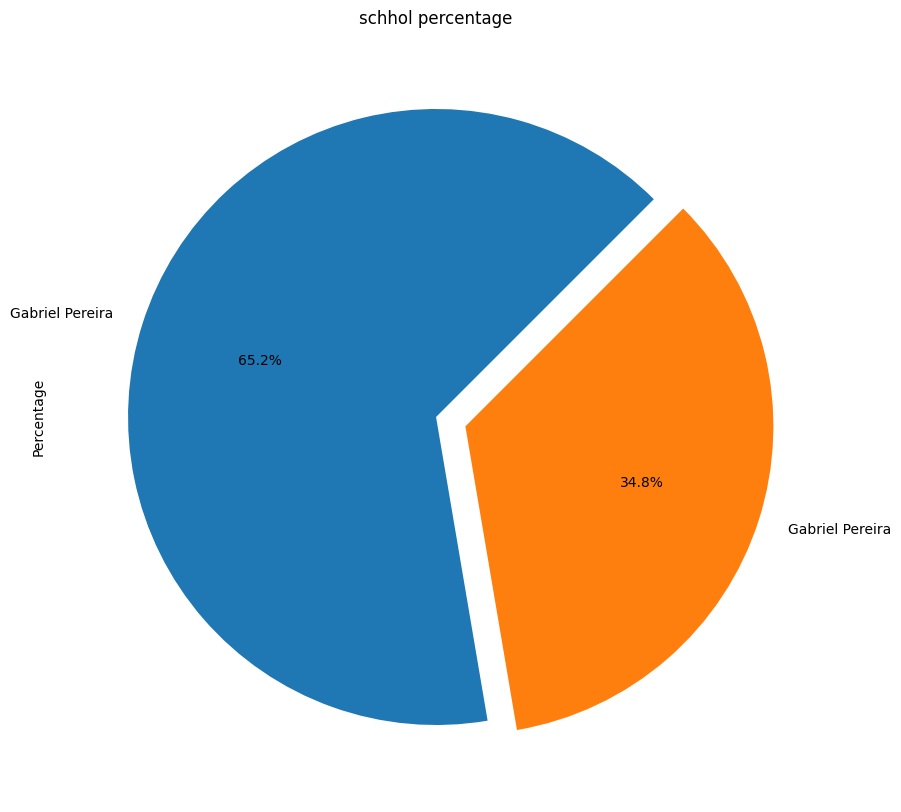

In [5]:
fig = plt.figure(figsize=(12,10))
df['school'].value_counts().plot.pie(autopct='%1.1f%%',labels=['Gabriel Pereira','Gabriel Pereira'],startangle=45,explode=(0,0.1))
plt.title('schhol percentage')
plt.ylabel('Percentage')
fig.show()

1) more student are avilable in Gabriel Pereira school 


In [6]:
a = df.groupby(by=['sex','school'])['age'].count().reset_index(name='count')


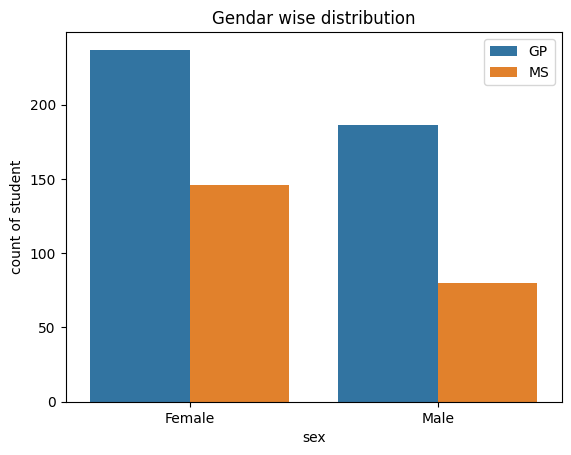

In [7]:
sns.barplot(data=a,x='sex',y='count',hue='school')
plt.title('Gendar wise distribution')
plt.xlabel('sex')
plt.ylabel('count of student')
plt.xticks([0,1],labels=['Female','Male'])
plt.legend()
plt.show()

1) as we clearily see Female students are more than male student in both schhol 
2) Gp schhol have higher number of students as compared to MS schhol

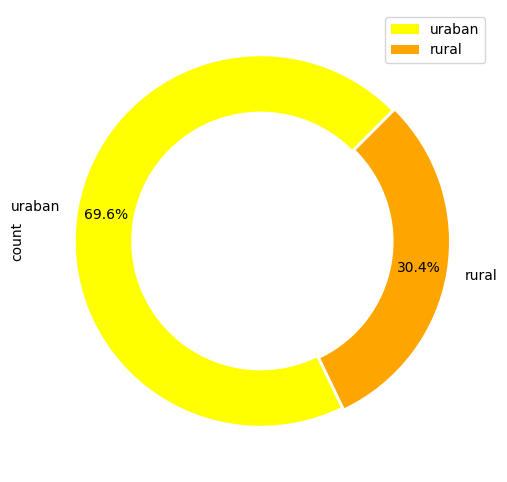

In [8]:
fig = plt.figure(figsize=( 10,6))
df['address'].value_counts().plot.pie(startangle=45,autopct='%1.1f%%',labels=['uraban','rural'],explode=(0,0.02),colors=['#FFFF00','#FFA500'],pctdistance=0.85,wedgeprops=dict(width=0.3))
plt.legend(labels=['uraban','rural'], loc="upper right")
plt.show()

In [9]:
b= df.groupby(by=['sex','school','address'])['age'].count().reset_index(name='count')
b['address_school'] = b['address']+'_'+b['school']
b.drop(['school','address'],axis=1,inplace=True)
b['address_school'] = b['address_school'].replace(to_replace={'R_GP':'rural GP','U_GP':'uraban GP','R_MS':'rural MS','U_MS':'urban MS'})

In [10]:
b

,sex,count,address_school
0,F,41,rural GP
1,F,196,uraban GP
2,F,79,rural MS
3,F,67,urban MS
4,M,37,rural GP
5,M,149,uraban GP
6,M,40,rural MS
7,M,40,urban MS


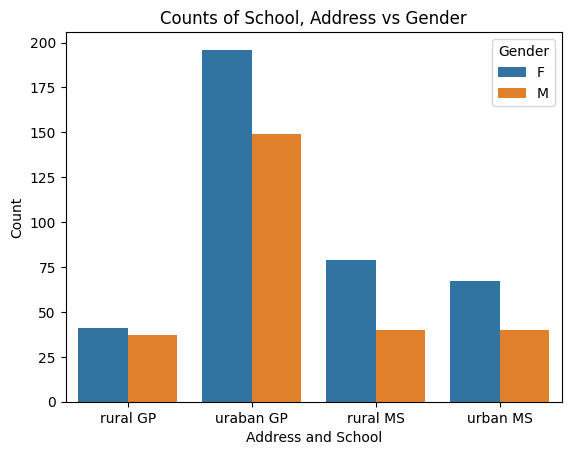

In [11]:
sns.barplot(data=b, x='address_school', y='count', hue='sex')
plt.legend(title='Gender')
plt.title('Counts of School, Address vs Gender')
plt.xlabel('Address and School')
plt.ylabel('Count')
plt.show()


1)Students belonging to urban regions mostly prefer GP schools, indicating that GP schools are more popular in urban areas.

2)Rural areas have a higher count of MS schools, suggesting that MS schools are more prevalent or preferred in rural regions.


In [12]:
c= df.groupby(by=['sex','school','address','reason'])['age'].count().reset_index(name='count')
c['address_school_reason'] = c['address']+'_'+c['school']+'_'+c['reason']
c.drop(['school','address','reason'],axis=1,inplace=True)

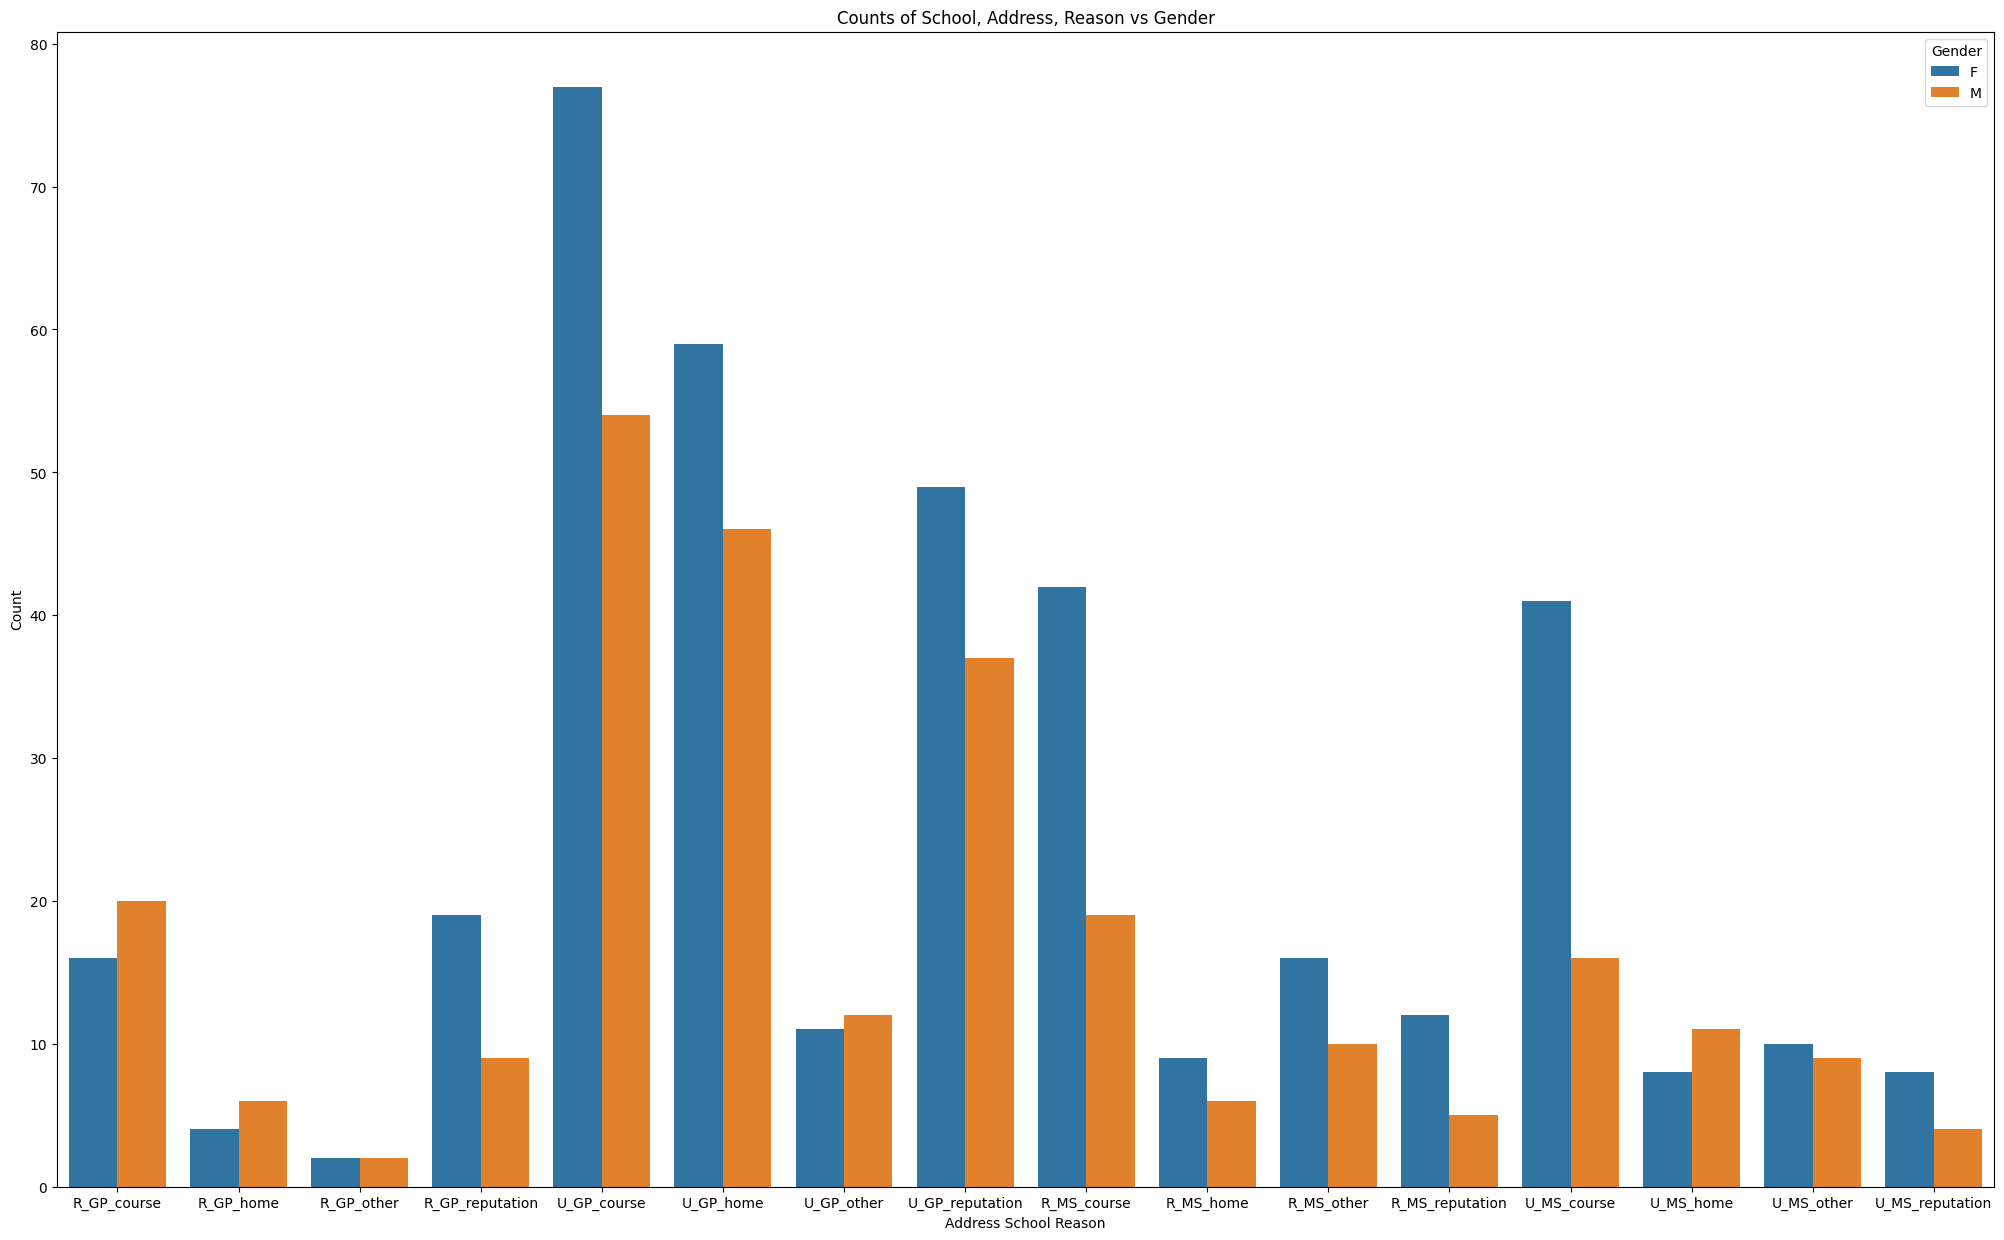

In [13]:
fig = plt.figure(figsize=(25,15))
sns.barplot(data=c, x='address_school_reason', y='count', hue='sex')
plt.legend(title='Gender')
plt.title('Counts of School, Address, Reason vs Gender')
plt.xlabel('Address School Reason')
plt.ylabel('Count')
plt.show()


In [14]:
d = df.groupby(by=['sex','address','reason'])['age'].count().reset_index(name='count')
d['address_reason'] = d['address'] +'_' +d['reason']
d.drop(['address','reason'],axis=1,inplace=True)
d = d.iloc[:,[0,2,1]]

<Axes: xlabel='address_reason', ylabel='count'>

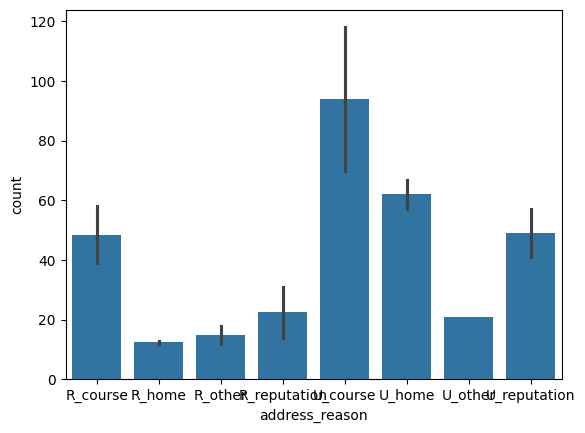

In [15]:
sns.barplot(data=d,x='address_reason',y='count')